<a href="https://colab.research.google.com/github/zrsteff/CSC587/blob/main/Lab%2014%20-%20lab_dbscan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

#Generate a 2D dataset with non-convex clusters


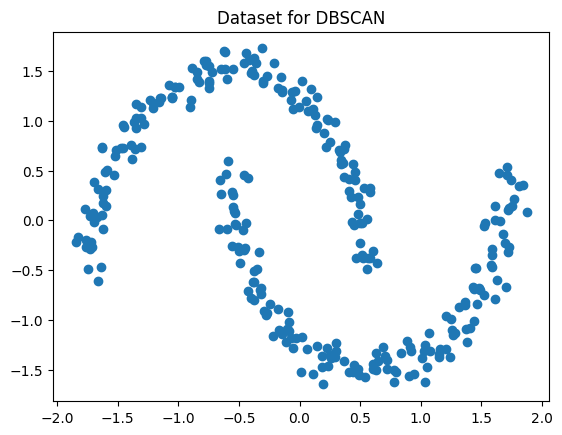

In [2]:
X, y = make_moons(n_samples=300, noise=0.05, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualize
plt.scatter(X_scaled[:, 0], X_scaled[:, 1])
plt.title("Dataset for DBSCAN")
plt.show()

#Applying DBSCAN

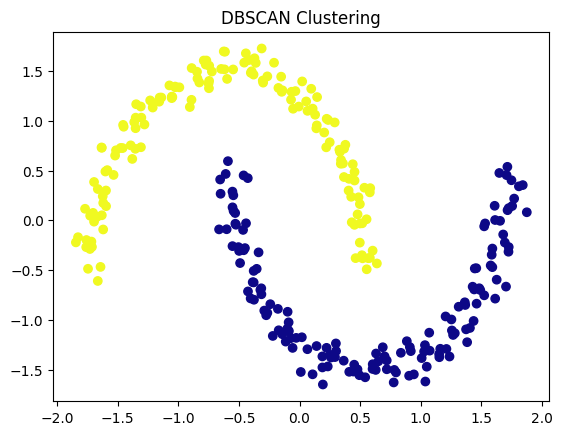

In [3]:

dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Plot clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='plasma')
plt.title("DBSCAN Clustering")
plt.show()

#Can you change epsilon and min values to observe how things change? For instance,

* Try eps=0.1, eps=0.5 and observe the difference.
* What happens when you change min_samples to 3 or 10?
* Can you also identify noise for each trial. (Hint: np.sum(labels == -1) after you your clusters)

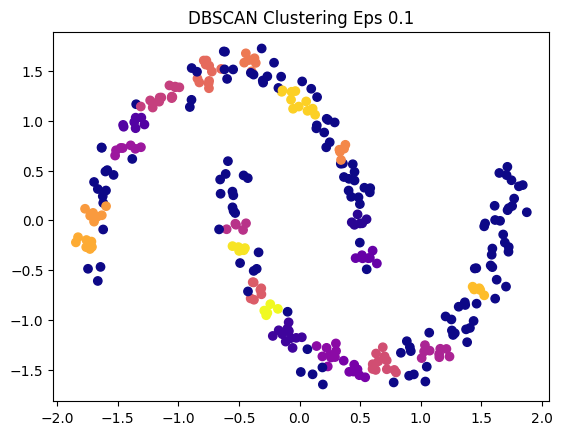

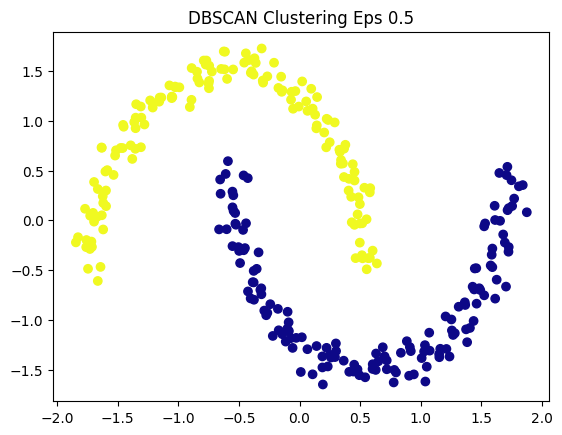

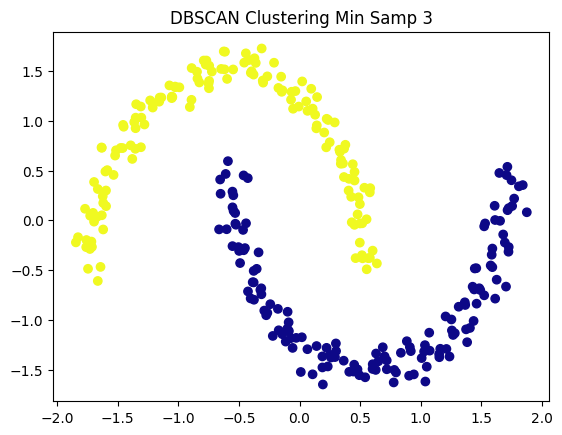

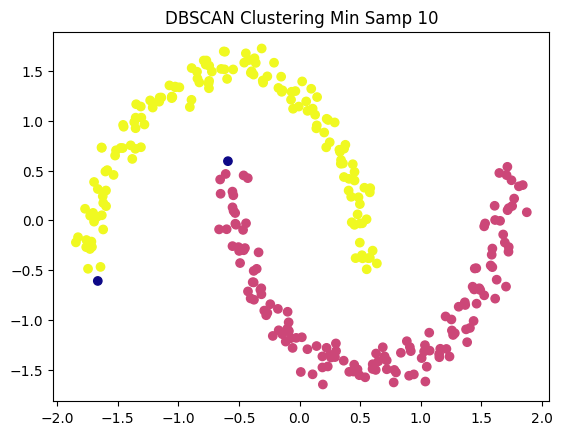

In [4]:
dbscan = DBSCAN(eps=0.1, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Plot clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='plasma')
plt.title("DBSCAN Clustering Eps 0.1")
plt.show()

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Plot clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='plasma')
plt.title("DBSCAN Clustering Eps 0.5")
plt.show()

dbscan = DBSCAN(eps=0.3, min_samples=3)
labels = dbscan.fit_predict(X_scaled)

# Plot clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='plasma')
plt.title("DBSCAN Clustering Min Samp 3")
plt.show()

dbscan = DBSCAN(eps=0.3, min_samples=10)
labels = dbscan.fit_predict(X_scaled)

# Plot clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='plasma')
plt.title("DBSCAN Clustering Min Samp 10")
plt.show()

#Use a real dataset:
* Try load_iris() from sklearn.datasets.
* Apply DBSCAN

Number of clusters found (excluding noise): 2
Number of noise points: 34


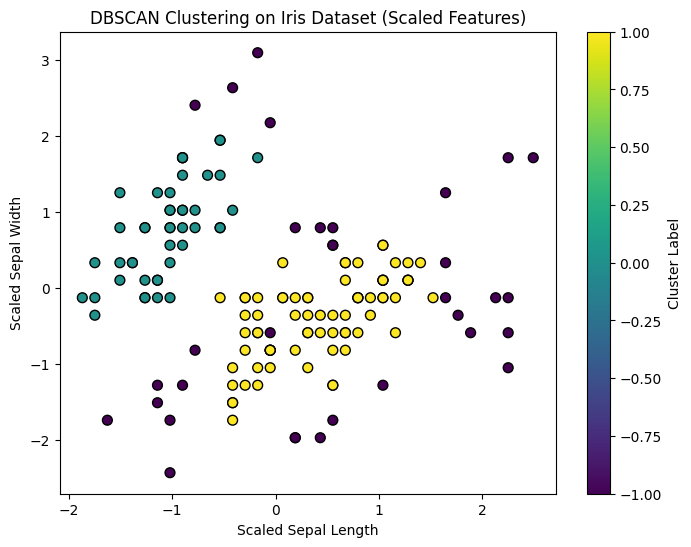

In [5]:
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df.head()

X_iris = iris_df.drop('target', axis=1)
scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris)
dbscan_iris = DBSCAN(eps=0.5, min_samples=5)
labels_iris = dbscan_iris.fit_predict(X_iris_scaled)
print(f"Number of clusters found (excluding noise): {len(set(labels_iris)) - (1 if -1 in labels_iris else 0)}")
print(f"Number of noise points: {np.sum(labels_iris == -1)}")
plt.figure(figsize=(8, 6))
plt.scatter(X_iris_scaled[:, 0], X_iris_scaled[:, 1], c=labels_iris, cmap='viridis', s=50, edgecolors='k')
plt.title('DBSCAN Clustering on Iris Dataset (Scaled Features)')
plt.xlabel('Scaled Sepal Length')
plt.ylabel('Scaled Sepal Width')
plt.colorbar(label='Cluster Label')
plt.show()
